In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

In [6]:
data_df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [7]:
data_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [8]:
data_df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [9]:
data_df.shape

(1525, 10)

In [10]:
data_df=data_df.drop('Unnamed: 0',axis=1)

In [11]:
data_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [12]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [13]:
data_df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [14]:
data_df.isna().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [16]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
           print(feature.upper() ," ",data_df[feature].nunique())
           print(data_df[feature].value_counts().sort_values())

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


In [17]:
for feature in data_df.columns:
    if data_df[feature].dtype!='object':
           print(feature.upper() ," ",data_df[feature].nunique())
           print(data_df[feature].value_counts().sort_values())

AGE   70
93     1
90     1
91     1
92     2
87     3
      ..
46    37
47    38
35    39
49    39
37    42
Name: age, Length: 70, dtype: int64
ECONOMIC.COND.NATIONAL   5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64
ECONOMIC.COND.HOUSEHOLD   5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64
BLAIR   5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64
HAGUE   5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64
EUROPE   11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64
POLITICAL.KNOWLEDGE   4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


In [18]:
print('Number of duplicate values :',data_df.duplicated().sum())

Number of duplicate values : 8


In [19]:
data_df[data_df.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [20]:
data_df.shape

(1525, 9)

In [21]:
data_df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [22]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
def univariateanalysis(column):
    print('Description of '+column)
    print('.................................................................')
    print(data_df[column].describe())
    
    plt.figure()
    print('.................................................................')
    print('Plot for '+column)
    print('.................................................................')
    
    print(sns.distplot(data_df[column],kde=True,color='g'))
    plt.show()
   
    
    plt.figure()
    print('.................................................................')
    print('Plot for '+column)
    print('.................................................................')
    print(sns.boxplot(data_df[column]))
    plt.show()

In [24]:
j=data_df.loc[:,data_df.dtypes!=object].columns.to_list()
j

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

In [25]:
k=data_df.loc[:,data_df.dtypes==object].columns.to_list()
k

['vote', 'gender']

In [26]:
def univariateanalysis_cat(column):
    sns.countplot(x=column,data=data_df)
    plt.show()

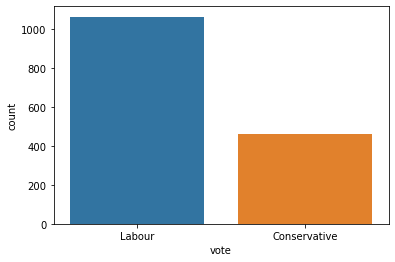

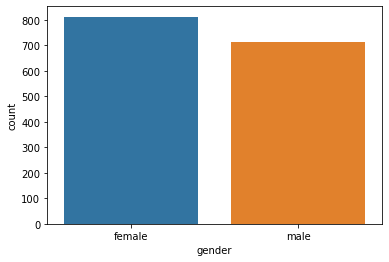

In [27]:
for i in k:
    univariateanalysis_cat(i);

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote', ylabel='count'>

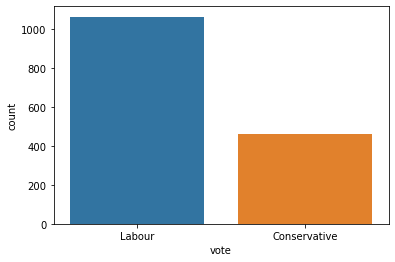

In [28]:
sns.countplot(data_df.vote)

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

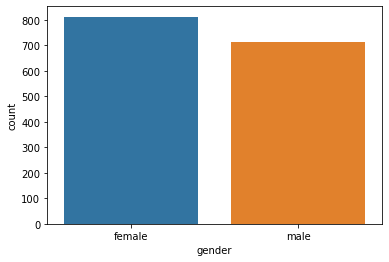

In [29]:
sns.countplot(data_df.gender)

Description of age
.................................................................
count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64
.................................................................
Plot for age
.................................................................


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


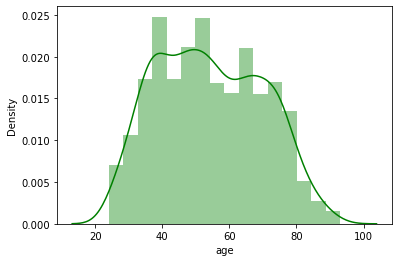

.................................................................
Plot for age
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


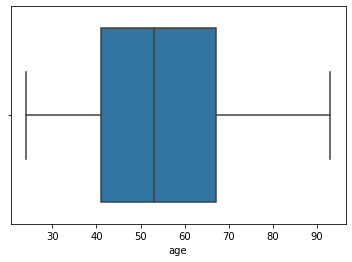

Description of economic.cond.national
.................................................................
count    1525.000000
mean        3.245902
std         0.880969
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64
.................................................................
Plot for economic.cond.national
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


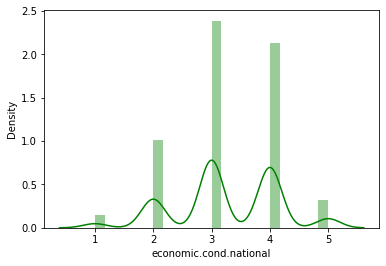

.................................................................
Plot for economic.cond.national
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


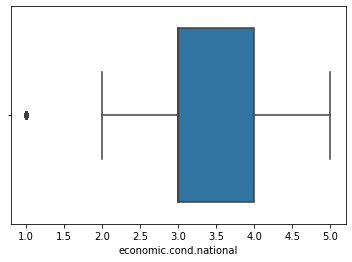

Description of economic.cond.household
.................................................................
count    1525.000000
mean        3.140328
std         0.929951
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64
.................................................................
Plot for economic.cond.household
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


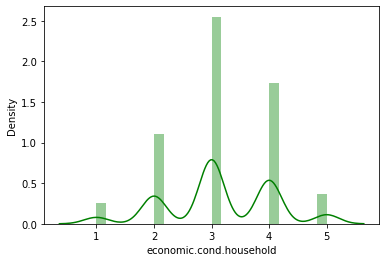

.................................................................
Plot for economic.cond.household
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


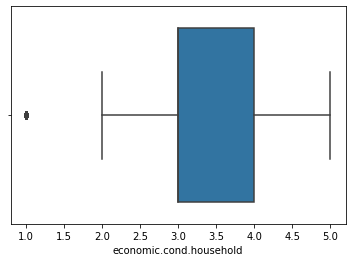

Description of Blair
.................................................................
count    1525.000000
mean        3.334426
std         1.174824
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64
.................................................................
Plot for Blair
.................................................................


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


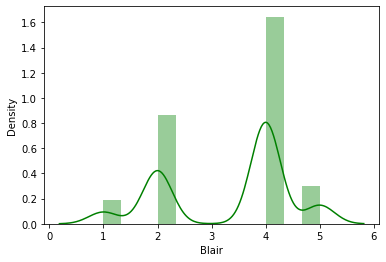

.................................................................
Plot for Blair
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


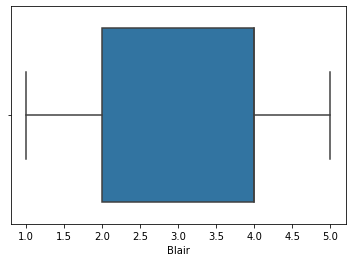

Description of Hague
.................................................................
count    1525.000000
mean        2.746885
std         1.230703
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64
.................................................................
Plot for Hague
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


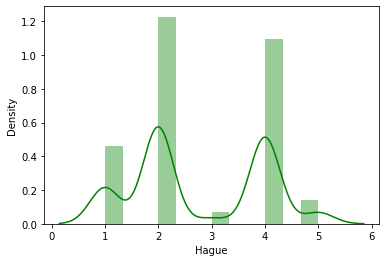

.................................................................
Plot for Hague
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


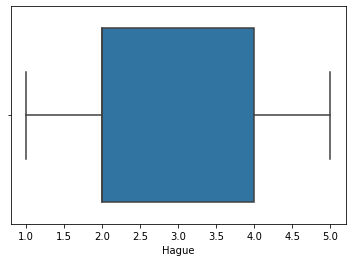

Description of Europe
.................................................................
count    1525.000000
mean        6.728525
std         3.297538
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64
.................................................................
Plot for Europe
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


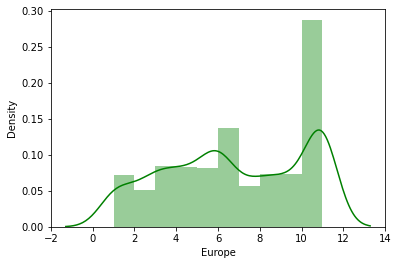

.................................................................
Plot for Europe
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


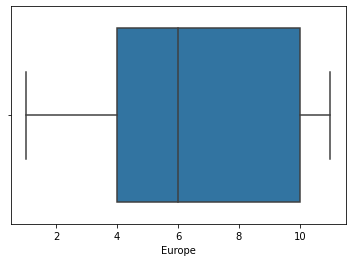

Description of political.knowledge
.................................................................
count    1525.000000
mean        1.542295
std         1.083315
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64
.................................................................
Plot for political.knowledge
.................................................................


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


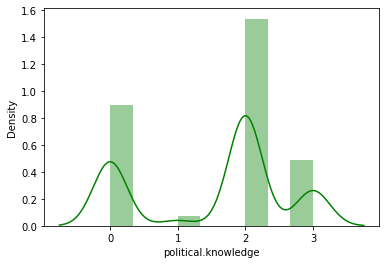

.................................................................
Plot for political.knowledge
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


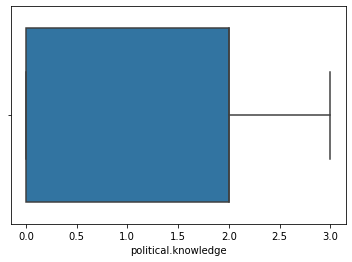

In [30]:
for i in j:
    univariateanalysis(i);

In [31]:
def univariateanalysis_cat(column):
    sns.boxplot(x=column,y='vote',data=data_df,hue='vote')
    plt.show()

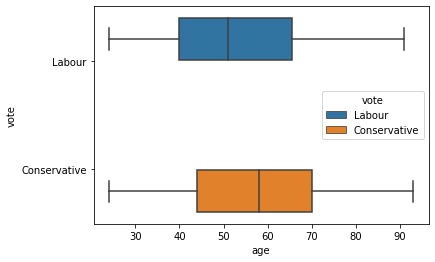

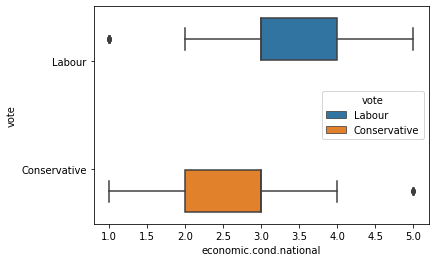

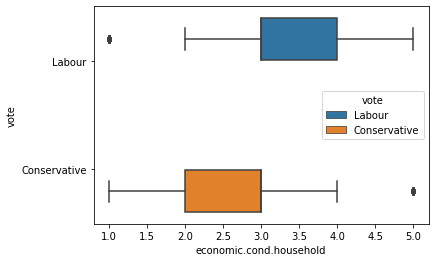

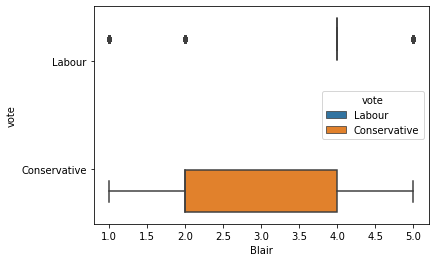

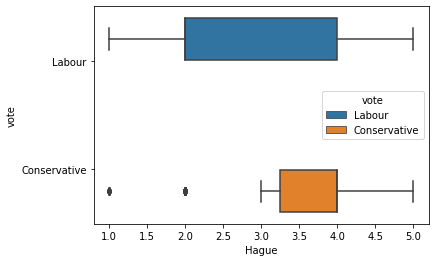

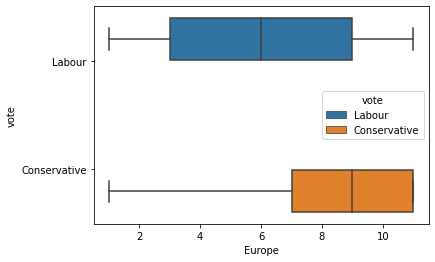

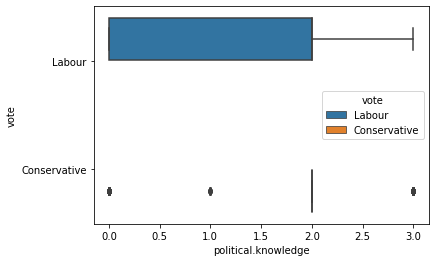

In [32]:
for i in j:
    univariateanalysis_cat(i)

In [33]:
def univariateanalysis_cat(column):
    sns.countplot(x=column,data=data_df,hue='vote')
    plt.show()

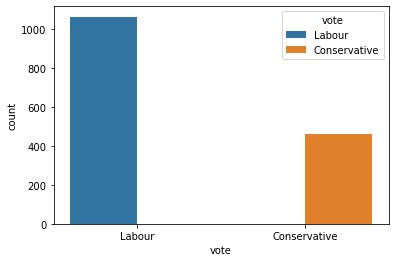

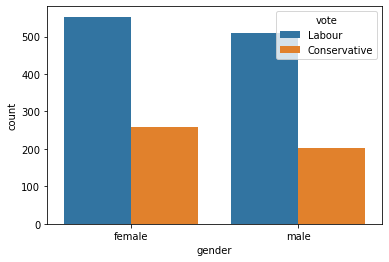

In [34]:
for i in k:
    univariateanalysis_cat(i)

In [35]:
def bivariate(column):
    sns.boxplot(x=column,y='age',data=data_df)
    plt.show()


In [36]:
k=['vote','economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge',
 'gender']

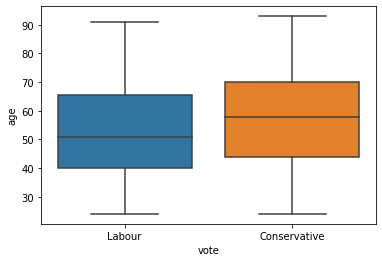

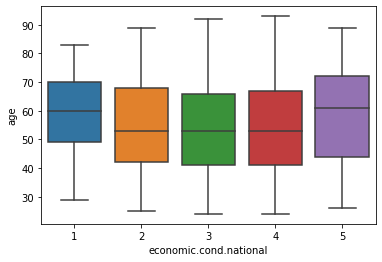

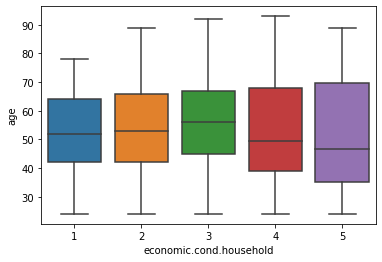

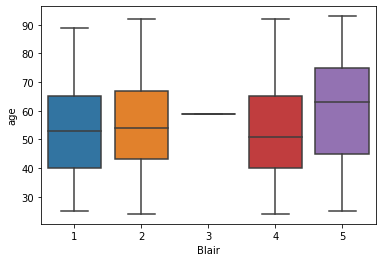

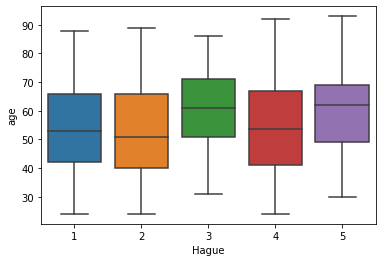

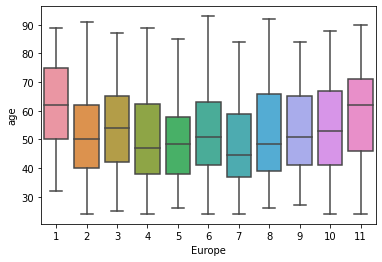

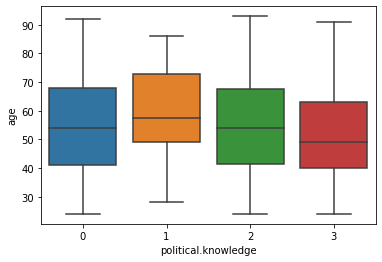

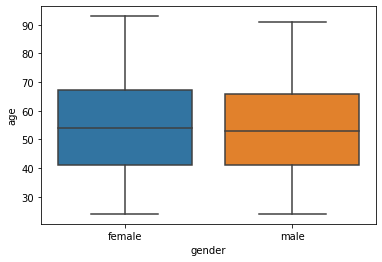

In [37]:
for a in k:
    bivariate(a)

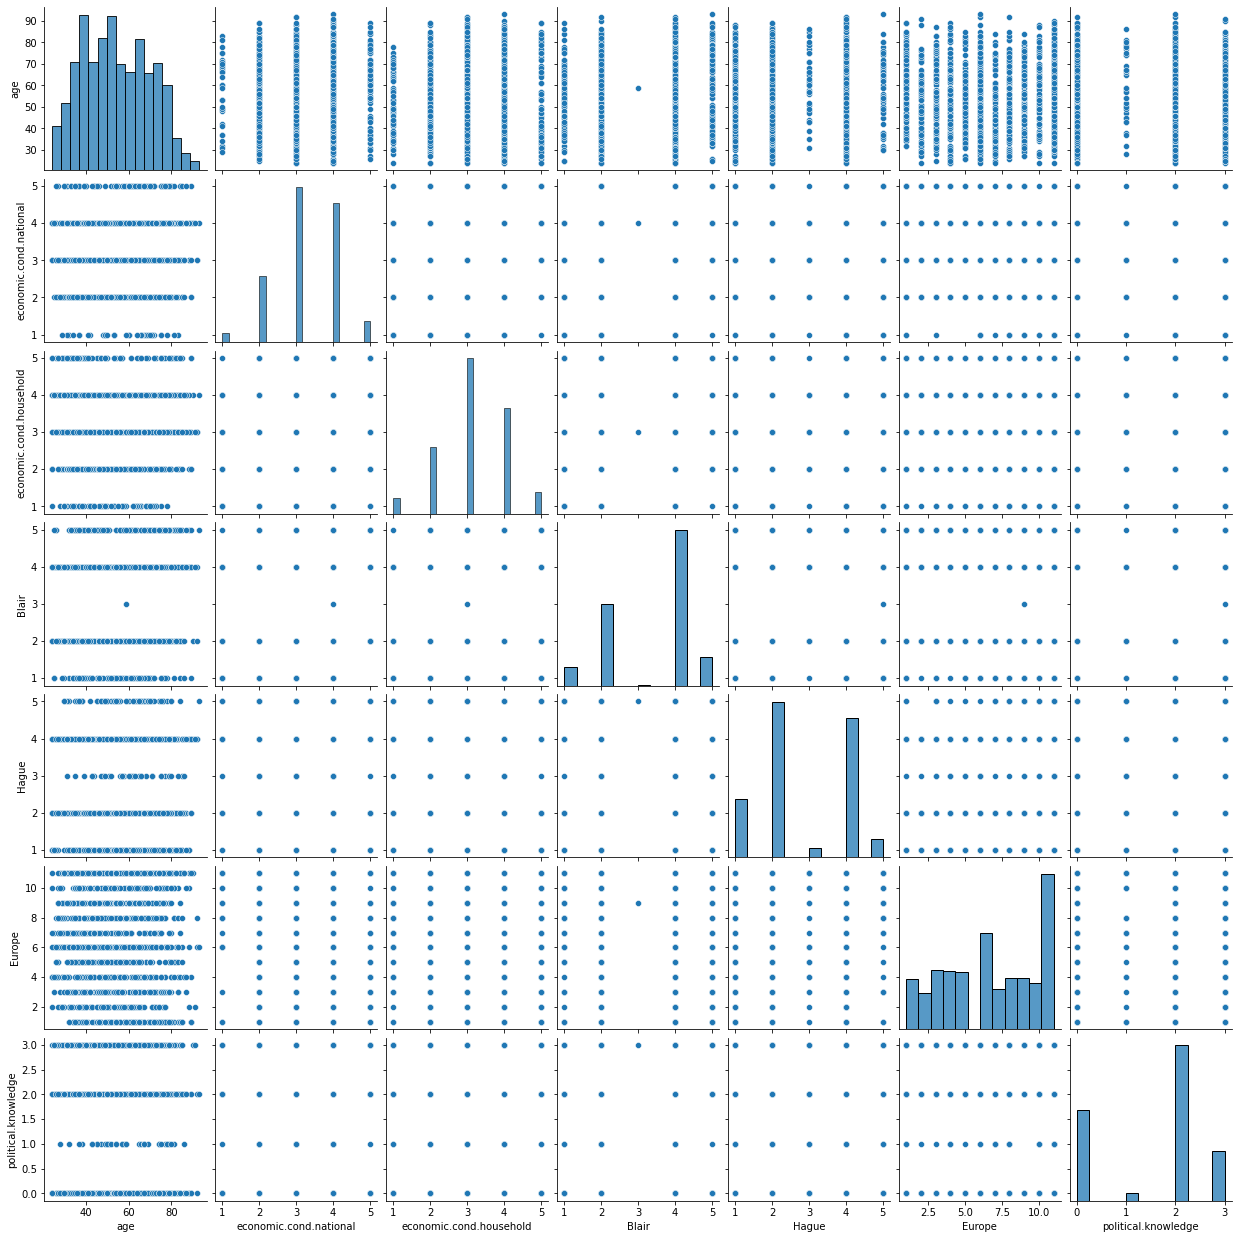

In [38]:
sns.pairplot(data_df)

<AxesSubplot:>

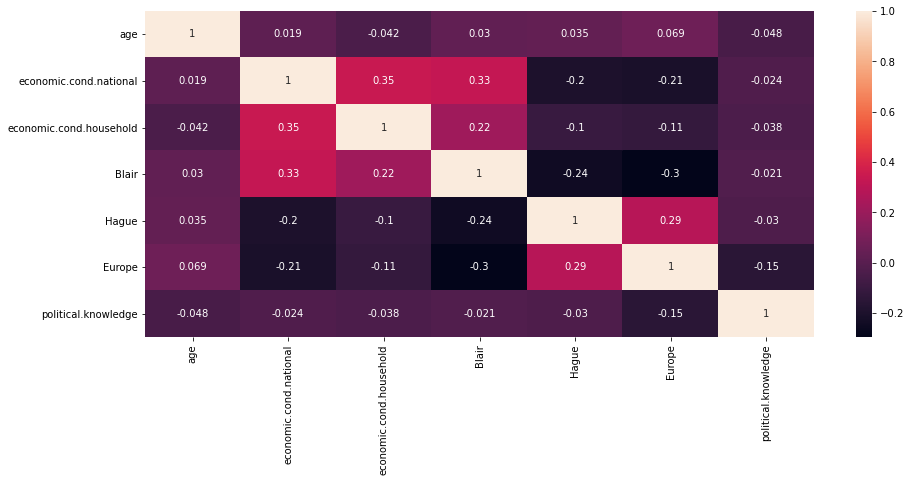

In [39]:
plt.figure(figsize=(15,6))
sns.heatmap(data_df.corr(),annot=True)

<AxesSubplot:>

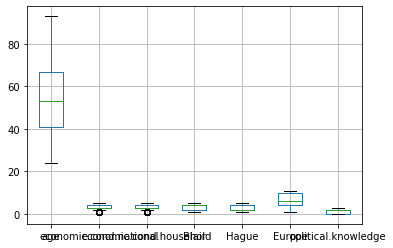

In [40]:
data_df.boxplot()

In [41]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [42]:
for column in j:
    lr,ur=remove_outlier(data_df[column])
    data_df[column]=np.where(data_df[column]>ur,ur,data_df[column])
    data_df[column]=np.where(data_df[column]<lr,lr,data_df[column])

In [43]:
def univariateanalysis(column):  

    
    #print(sns.histplot(df[column]))
    #plt.show()
    print('Plot for '+column)
    print('.................................................................')
    print(sns.boxplot(data_df[column]))
    plt.show()
    

Plot for age
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


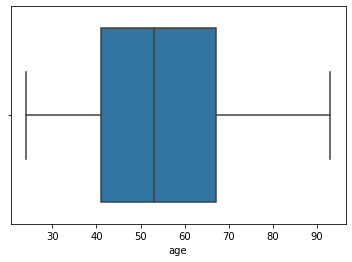

Plot for economic.cond.national
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


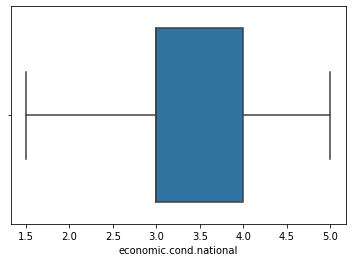

Plot for economic.cond.household
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


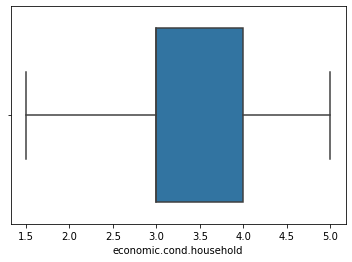

Plot for Blair
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


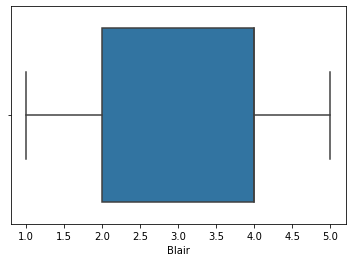

Plot for Hague
.................................................................


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


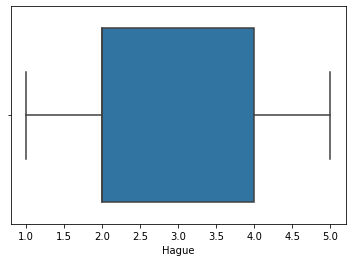

Plot for Europe
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


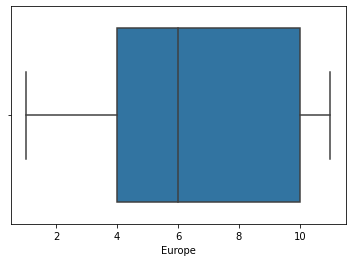

Plot for political.knowledge
.................................................................


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


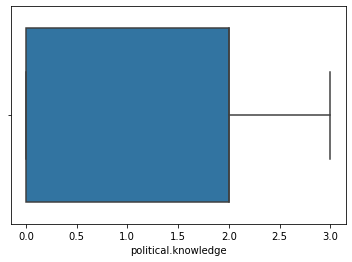

In [44]:
for i in j:
    univariateanalysis(i);

In [45]:
cat1=['vote','gender']

In [46]:
df=pd.get_dummies(data_df,columns=cat1,drop_first=True)
#f =pd.get_dummies(data_df, columns=cat1,drop_first=True)


In [47]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,1,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,1,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1,1


In [48]:
df= df.rename(columns={'vote_Labour':'vote' ,'gender_male':'gender'},inplace= False)

In [49]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote,gender
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,1,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,1,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1,1


In [50]:
X=df.drop('vote',axis=1)
Y=df['vote']

In [51]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

In [182]:
X1=X.copy()

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
#Logistic_model=LogisticRegression()
#Logistic_model.fit(X_train,Y_train)

In [54]:
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, Y_train)

C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,Y_train)
print('Train Accuracy score ',Logistic_model_score)
print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

Train Accuracy score  0.8397375820056232
[[229 103]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [56]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.614795,0.385205
1,0.191758,0.808242
2,0.186141,0.813859
3,0.168057,0.831943
4,0.050775,0.949225


# AUC ROC curve for Logistic Regression Train

AUC: 0.890


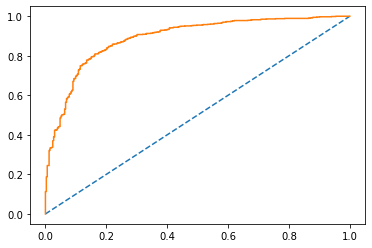

In [57]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


In [58]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,Y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8209606986899564
[[ 85  45]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [59]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.920378,0.079622
1,0.690765,0.309235
2,0.349905,0.650095
3,0.482750,0.517250
4,0.164379,0.835621


# AUC ROC curve for Logistic Regression Test

AUC: 0.883


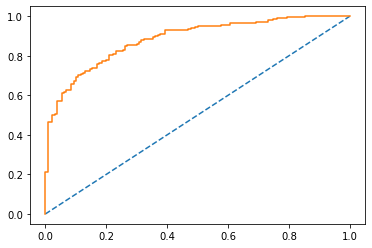

In [60]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

# Discriminant Analysis

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [62]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [63]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,Y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8397375820056232
[[236  96]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



the auc 0.889 


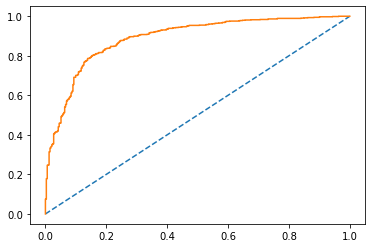

In [64]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [65]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,Y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



# AUC ROC curve for LDA Test


the auc curve 0.884 


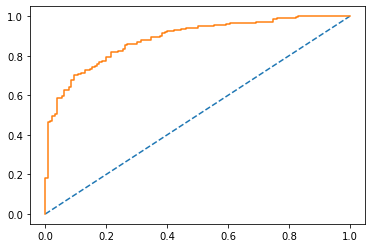

In [66]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

# KNN

In [67]:
x=df.drop("vote",axis=1)

y=df["vote"]

In [68]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [69]:
from scipy.stats import zscore

In [70]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender']].apply(zscore)

In [71]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=1)

In [73]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data_df.index)) * 100))

69.97% data is in training set
30.03% data is in test set


In [74]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)

In [76]:
print(KNN_model_score)

0.8641049671977507


In [77]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[249  83]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



# AUC ROC Curve KNN Train

the auc 0.930 


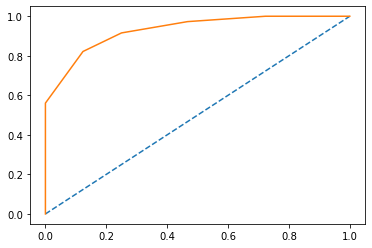

In [78]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [79]:
y_test_predict=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test, y_test)

print(KNN_model_score)

0.8187772925764192


In [80]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 91  39]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



# AUC ROC Curve KNN Test

the auc curve 0.869 


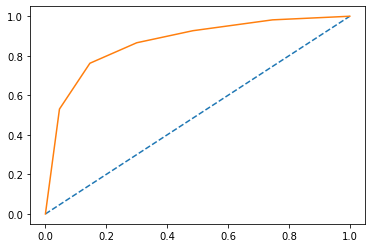

In [81]:

probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [82]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [83]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8547328959700093
[[245  87]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



In [84]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8209606986899564
[[ 90  40]
 [ 42 286]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [85]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8641049671977507
[[249  83]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



In [87]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8187772925764192
[[ 91  39]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [88]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.22707423580786024,
 0.1899563318777293,
 0.18122270742358082,
 0.17903930131004364,
 0.1834061135371179,
 0.1834061135371179,
 0.17685589519650657,
 0.17903930131004364,
 0.16593886462882101,
 0.17030567685589515]

# AUC ROC curve after n classifier for train data set


the auc curve 0.900 


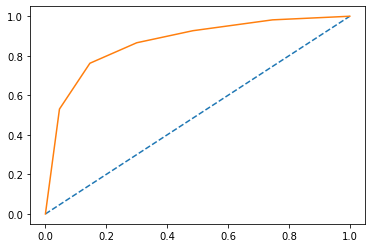

In [89]:
probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

# AUC ROC curve after n classifier for test data set

the auc curve 0.897 


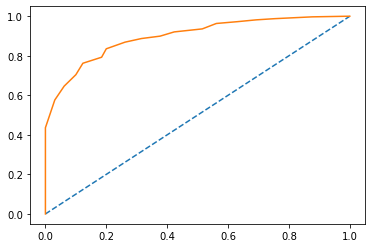

In [138]:
probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

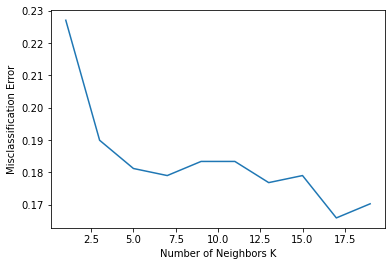

In [139]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [141]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [142]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8322399250234301
[[240  92]
 [ 87 648]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



the auc 0.887 


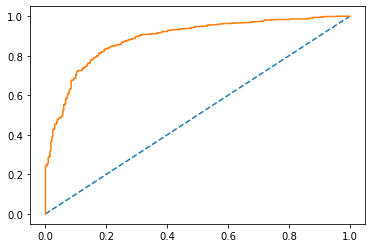

In [143]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [144]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8231441048034934
[[ 94  36]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



the auc curve 0.885 


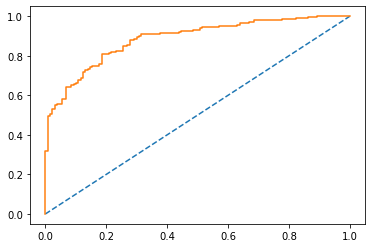

In [145]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

# MODEL TUNING FOR LOGISTIC REGRESSION

In [146]:
grid={'penalty':['12','none'],
      'solver':['saga','lbfgs','newton-cg'],
      'tol':[0.1,0.01,0.001],
      'max_iter':[100,200,300,400,500],
      'n_jobs':[1,2,3]}

In [147]:
Model=LogisticRegression()

In [148]:
grid_search= GridSearchCV(estimator=Model,param_grid=grid,cv=5)

In [149]:
grid_search.fit(X_train,Y_train)

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\diksha\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\diksha\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\diksha\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\diksha\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached whic

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elast

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\diksha\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\diksha\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

C:\diksha\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.78917555 0.82570752 0.82570313
 0.83224518 0.83224518 0.83224518 0.83412312 0.83318415 0.83318415
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.79387916 0.82570752 0.82663771
 0.83224518 0.83224518 0.83224518 0.83412312 0.83318415 0.83318415
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.79198368 0.82570752 0.82570313
 0.83224518 0.83224518 0.83224518 0.83412312 0.83318415 0.83318415
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.79292264 0.82383397 0.82288623
 0.83318415 0.83318415 0.83318415 0.83412312 0.83318415 0.83318415
        nan        nan        nan        nan        nan        nan
 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300, 400, 500],
                         'n_jobs': [1, 2, 3], 'penalty': ['12', 'none'],
                         'solver': ['saga', 'lbfgs', 'newton-cg'],
                         'tol': [0.1, 0.01, 0.001]})

In [150]:
grid_search.best_params_

{'max_iter': 100,
 'n_jobs': 1,
 'penalty': 'none',
 'solver': 'newton-cg',
 'tol': 0.1}

In [151]:
best_model=grid_search.best_estimator_
best_model

LogisticRegression(n_jobs=1, penalty='none', solver='newton-cg', tol=0.1)

In [152]:
ytrain_pred=best_model.predict(X_train)
ytest_pred=best_model.predict(X_test)

In [153]:
ytest_pred_prob=best_model.predict_proba(X_test)
ytest_pred_prob
pd.DataFrame(ytest_pred_prob).head()

,0,1
0,0.922010,0.077990
1,0.690473,0.309527
2,0.346714,0.653286
3,0.488825,0.511175
4,0.158940,0.841060


AUC: 0.890


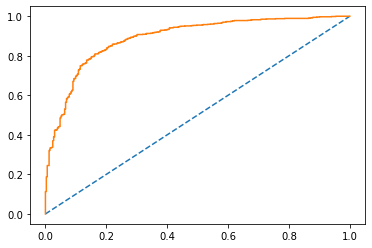

In [154]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


# Model Tuning for KNN

In [155]:
leaf_size=list(range(1,50))
n_neighbors=list(range(1,30))
p=[1,2]
hyper_parms=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)
KNN1=KNeighborsClassifier()
grid_search=GridSearchCV(KNN1,hyper_parms,cv=5)

In [156]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [157]:
grid_search.best_params_

{'leaf_size': 1, 'n_neighbors': 11, 'p': 2}

In [158]:
best_model=grid_search.best_estimator_
best_model

KNeighborsClassifier(leaf_size=1, n_neighbors=11)

In [159]:
ytrain_pred_knn=best_model.predict(x_train)
ytest_pred_knn=best_model.predict(x_test)

In [160]:
ytest_pred_prob_knn=best_model.predict_proba(x_test)
ytest_pred_prob_knn
pd.DataFrame(ytest_pred_prob).head()

,0,1
0,0.922010,0.077990
1,0.690473,0.309527
2,0.346714,0.653286
3,0.488825,0.511175
4,0.158940,0.841060


# Model Tuning for Decison Tree Classifier

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
DT=DecisionTreeClassifier(criterion='gini',random_state=1)
DT.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [163]:
Y_dt_train=DT.predict(X_train)
Y_dt_test=DT.predict(X_test)

In [164]:
DTR=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
DTR.fit(X_train,Y_train)
print(DTR.score(X_train,Y_train))
print(DTR.score(X_test,Y_test))

0.8472352389878163
0.8122270742358079


In [165]:
print(pd.DataFrame(DTR.feature_importances_,columns=['Imp'],index=X_train.columns))

                              Imp
age                      0.036732
economic.cond.national   0.022153
economic.cond.household  0.019490
Blair                    0.157607
Hague                    0.426457
Europe                   0.216291
political.knowledge      0.121270
gender                   0.000000


# Model Tunning Ensemble_Technique

In [166]:
from sklearn.ensemble import BaggingClassifier

In [167]:
bgc=BaggingClassifier(base_estimator=DT,n_estimators=10,random_state=1)
bgc=bgc.fit(X_train,Y_train)

In [168]:
y_dt_bgc_train=bgc.predict(X_train)
y_dt_bgc_test=bgc.predict(X_test)

# ADA BOOSTING

In [169]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier (n_estimators=100, random_state=1)

#abcl = AdaBoostclassifier( n estimators-50, random_state=1)

adb= adb.fit(X_train, Y_train)

In [170]:
y_ab_train=adb.predict(X_train)
y_ab_test=adb.predict(X_test)

In [171]:
y_ab_train

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [172]:
y_ab_test

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [173]:
from sklearn.ensemble import GradientBoostingClassifier

In [174]:
gbc=GradientBoostingClassifier(random_state=1)
gbc=gbc.fit(X_train,Y_train)

In [175]:
y_gbc_train=gbc.predict(X_train)
y_gbc_test=gbc.predict(X_test)

In [176]:
y_gbc_train

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [177]:
y_gbc_test

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,

# RANDOM FOREST

In [194]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid= {'max_depth': [8,9,10],
             'max_features': [5,6,7],
             'min_samples_leaf': [9,12,15],
             'min_samples_split': [50,70],
             'n_estimators': [100],
             'random_state': [1]}
             
rfcl = RandomForestClassifier()

grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid, cv = 5)

In [195]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [9, 12, 15],
                         'min_samples_split': [50, 70], 'n_estimators': [100],
                         'random_state': [1]})

In [196]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 12,
 'min_samples_split': 50,
 'n_estimators': 100,
 'random_state': 1}

# RANDOM FOREST

In [199]:
from sklearn.ensemble import BaggingClassifier
bgc16= BaggingClassifier(base_estimator=grid_search, n_estimators=5, random_state=1)
bgc16=bgc16.fit(X_train, Y_train)

In [207]:
from sklearn.ensemble import BaggingClassifier

bgc16= BaggingClassifier (grid_search, n_estimators=5, random_state=1) #bgcl = BaggingClassifier (n estimators-50, random_state=1)

bgc16


BaggingClassifier(base_estimator=GridSearchCV(cv=5,
                                              estimator=RandomForestClassifier(),
                                              param_grid={'max_depth': [8, 9,
                                                                        10],
                                                          'max_features': [5, 6,
                                                                           7],
                                                          'min_samples_leaf': [9,
                                                                               12,
                                                                               15],
                                                          'min_samples_split': [50,
                                                                                70],
                                                          'n_estimators': [100],
                                                    

In [209]:
bgc16=bgc16.fit(X_train,Y_train)

In [ ]:
y_train_predict_bg16=bgc16.predict(X_train)
y_test_predict_bgc16=bgc16.predict(X_test)